In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from statistics import mode

In [10]:
pd.set_option("display.max_columns", None)

In [2]:
accident = pd.read_parquet("../data/accident_data.parquet")
vehicle = pd.read_parquet("../data/vehicle_data.parquet")

In [3]:
accident.shape, vehicle.shape

((1048575, 34), (2177205, 24))

In [11]:
accident.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,None,0.0,Serious,None,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,None,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,None,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,None,0.0,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,None,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,None,0.0,None,0.0,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No


In [12]:
vehicle.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,ROVER,45 CLASSIC 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,BMW,C1,None,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,LONDON TAXIS INT,TXII GOLD AUTO,None,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,PIAGGIO,VESPA ET4,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


### F-1: Common Columns

In [4]:
np.intersect1d(accident.columns, vehicle.columns)

array(['Accident_Index', 'Year'], dtype=object)

In [5]:
len(accident["Accident_Index"]), len(set(accident["Accident_Index"]))

(1048575, 671340)

### F-2: Duplicate Columns

In [6]:
df1 = accident.drop_duplicates()

In [14]:
df1.shape[0], accident.shape[0]

(1048569, 1048575)

In [7]:
df2 = vehicle.drop_duplicates()

In [15]:
df2.shape[0], vehicle.shape[0]

(2177205, 2177205)

### F-3: Missing Values

In [17]:
accident.isna().sum().sort_values(ascending=False)/len(accident)*100

2nd_Road_Class                                 41.944925
1st_Road_Class                                 29.143266
LSOA_of_Accident_Location                       6.855971
Weather_Conditions                              2.040102
2nd_Road_Number                                 1.030255
Road_Type                                       0.692940
Light_Conditions                                0.198746
Road_Surface_Conditions                         0.113392
Did_Police_Officer_Attend_Scene_of_Accident     0.025654
Longitude                                       0.010681
Location_Northing_OSGR                          0.010586
Location_Easting_OSGR                           0.010586
Latitude                                        0.010586
Time                                            0.009537
Urban_or_Rural_Area                             0.008106
InScotland                                      0.004101
Pedestrian_Crossing-Physical_Facilities         0.003529
Carriageway_Hazards            

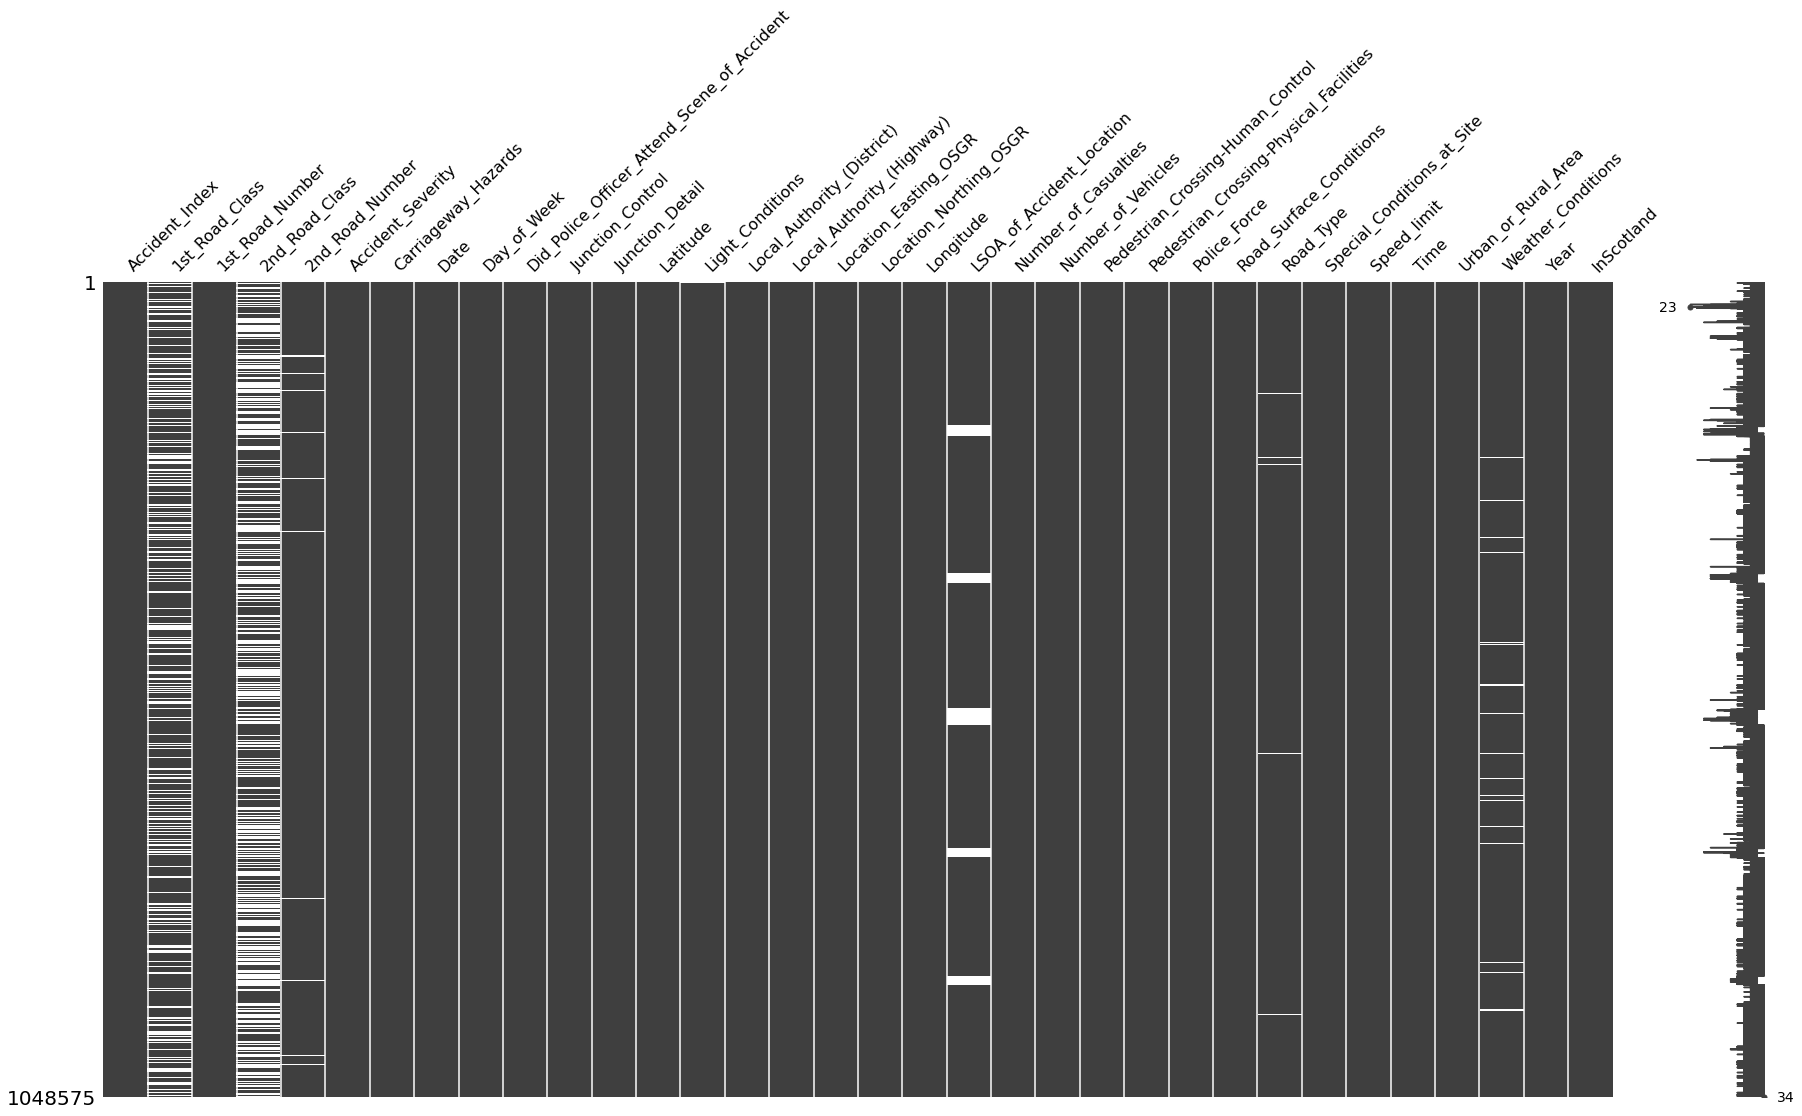

In [21]:
missingno.matrix(accident, figsize = (30,15));

In [20]:
vehicle.isna().sum().sort_values(ascending=False)/len(vehicle)*100

Driver_IMD_Decile                   33.750244
Age_of_Vehicle                      16.449944
model                               14.942598
Engine_Capacity_.CC.                12.211115
Propulsion_Code                     11.291679
make                                 5.091160
Vehicle_Location.Restricted_Lane     0.060490
Towing_and_Articulation              0.000000
X1st_Point_of_Impact                 0.000000
Was_Vehicle_Left_Hand_Drive          0.000000
Vehicle_Type                         0.000000
Vehicle_Reference                    0.000000
Vehicle_Manoeuvre                    0.000000
Vehicle_Leaving_Carriageway          0.000000
Accident_Index                       0.000000
Skidding_and_Overturning             0.000000
Sex_of_Driver                        0.000000
Age_Band_of_Driver                   0.000000
Junction_Location                    0.000000
Journey_Purpose_of_Driver            0.000000
Hit_Object_off_Carriageway           0.000000
Hit_Object_in_Carriageway         

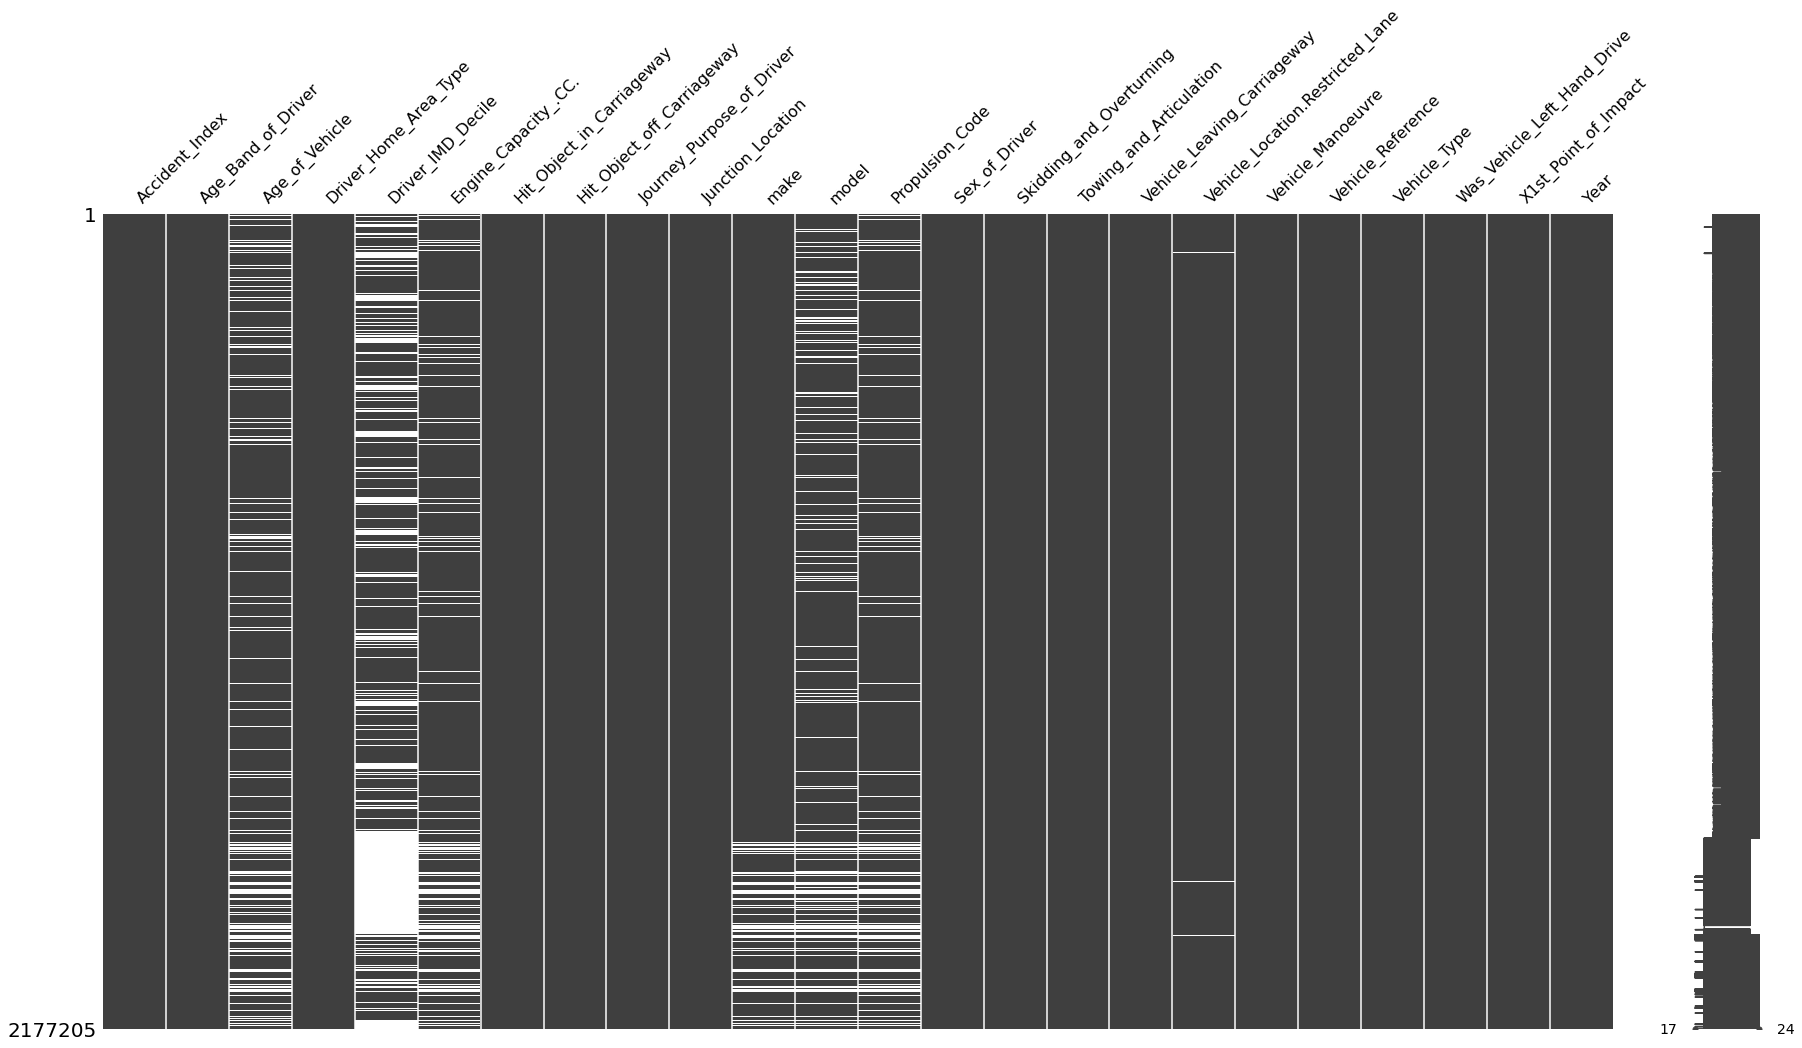

In [22]:
missingno.matrix(vehicle, figsize = (30,15));

### Find Duplicate `Accident_Index`

In [16]:
duplicate_acc_idx = accident["Accident_Index"].count() - len(set(accident["Accident_Index"]))
duplicate_acc_idx

377235

In [17]:
duplicate_vehicle_idx = vehicle["Accident_Index"].count() - len(set(vehicle["Accident_Index"]))
duplicate_vehicle_idx

688224

In [22]:
most_repeated = mode(accident["Accident_Index"])
most_repeated

'2.00513E+12'

In [23]:
accident[accident["Accident_Index"] == most_repeated]

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
61419,2.00513E+12,None,0.0,Unclassified,0.0,Fatal,None,02/01/2005,Sunday,1.0,Give way or uncontrolled,Crossroads,53.810339,Darkness - lights lit,Leeds,Leeds,431480.0,435000.0,-1.523410,E01011673,2,3,0.0,0.0,West Yorkshire,Wet or damp,Single carriageway,None,30,22:54,Urban,Fine no high winds,2005,No
61420,2.00513E+12,None,0.0,Unclassified,0.0,Serious,None,01/01/2005,Saturday,1.0,Give way or uncontrolled,More than 4 arms (not roundabout),53.792139,Daylight,Leeds,Leeds,432200.0,432980.0,-1.512687,E01011625,1,2,0.0,0.0,West Yorkshire,Wet or damp,Single carriageway,None,30,08:00,Urban,Raining no high winds,2005,No
61421,2.00513E+12,A,646.0,Unclassified,0.0,Serious,None,01/01/2005,Saturday,1.0,Give way or uncontrolled,T or staggered junction,53.733001,Daylight,Calderdale,Calderdale,390540.0,426300.0,-2.144883,E01010986,1,1,0.0,0.0,West Yorkshire,Wet or damp,Single carriageway,None,30,14:30,Rural,Raining + high winds,2005,No
61422,2.00513E+12,A,61.0,A,61.0,Slight,None,01/01/2005,Saturday,1.0,Auto traffic signal,More than 4 arms (not roundabout),53.794292,Daylight,Leeds,Leeds,430780.0,433210.0,-1.534219,E01011365,1,2,0.0,0.0,West Yorkshire,Wet or damp,Dual carriageway,Auto traffic signal - out,30,14:45,Urban,Raining no high winds,2005,No
61423,2.00513E+12,A,650.0,A,6038.0,Slight,None,02/01/2005,Sunday,1.0,Give way or uncontrolled,Roundabout,53.827802,Darkness - lights lit,Bradford,Bradford,414560.0,436860.0,-1.780277,E01010789,1,2,0.0,0.0,West Yorkshire,Wet or damp,Dual carriageway,None,70,17:40,Urban,Raining no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68691,2.00513E+12,None,0.0,A,6120.0,Slight,None,24/12/2005,Saturday,1.0,Give way or uncontrolled,T or staggered junction,53.816785,Daylight,Leeds,Leeds,421300.0,435660.0,-1.677961,E01011588,1,2,0.0,0.0,West Yorkshire,Dry,Single carriageway,None,30,17:00,Rural,Fine no high winds,2005,No
68692,2.00513E+12,None,0.0,None,0.0,Slight,None,19/11/2005,Saturday,1.0,Data missing or out of range,Not at junction or within 20 metres,53.817505,Daylight,Leeds,Leeds,427100.0,435770.0,-1.589858,E01011477,1,2,0.0,0.0,West Yorkshire,Dry,Single carriageway,None,30,15:00,Urban,Fine no high winds,2005,No
68693,2.00513E+12,None,0.0,None,0.0,Slight,None,30/11/2005,Wednesday,2.0,Data missing or out of range,Not at junction or within 20 metres,53.674239,Darkness - lights lit,Wakefield,Wakefield,443160.0,419950.0,-1.348139,E01011779,2,2,0.0,0.0,West Yorkshire,Wet or damp,Single carriageway,None,30,17:23,Urban,Fine no high winds,2005,No
68694,2.00513E+12,None,0.0,A,616.0,Slight,None,21/12/2005,Wednesday,2.0,Give way or uncontrolled,T or staggered junction,53.637717,Daylight,Kirklees,Kirklees,414010.0,415710.0,-1.789585,E01011229,2,2,0.0,0.0,West Yorkshire,Wet or damp,Single carriageway,None,30,13:20,Urban,None,2005,No


In [25]:
vehicle[vehicle["Accident_Index"] == mode(vehicle["Accident_Index"])].head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
1446553,2013460234852,36 - 45,2.0,Urban area,5.0,1598.0,None,None,Commuting to/from work,Not at or within 20 metres of junction,VOLKSWAGEN,CADDY MAXI C20 TDI,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Van / Goods 3.5 tonnes mgw or under,No,Back,2013
1446554,2013460234852,46 - 55,12.0,Urban area,4.0,1794.0,None,None,Not known,Not at or within 20 metres of junction,TOYOTA,AVENSIS VERMONT VVTI,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Car,No,Back,2013
1446555,2013460234852,16 - 20,13.0,Urban area,5.0,998.0,None,None,Not known,Not at or within 20 metres of junction,NISSAN,MICRA S,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,5,Car,No,Front,2013
1446556,2013460234852,46 - 55,4.0,Urban area,6.0,1998.0,None,None,Not known,Not at or within 20 metres of junction,RENAULT,MEGANE PRIVILEGE TCE,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,6,Car,No,Did not impact,2013
1446557,2013460234852,26 - 35,NaN,Urban area,2.0,1686.0,None,None,Not known,Not at or within 20 metres of junction,VAUXHALL,MOKKA SE CDTI S/S,Heavy oil,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,8,Car,No,Did not impact,2013


In [27]:
vehicle[vehicle["Accident_Index"] == most_repeated]

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year


### Merged data

In [29]:
# Using inner join to keep only common data between both datasets
df_merged = accident.merge(vehicle, on="Accident_Index", how="inner")
df_merged.shape

(528335, 57)

In [40]:
df_merged.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,InScotland,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,DENNIS,None,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,C,0.0,None,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,DENNIS,None,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,A,3220.0,None,0.0,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,None,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No,46 - 55,4.0,Urban area,1.0,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,ALMERA SE AUTO,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,None,0.0,None,0.0,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,HONDA,None,Petrol,Male,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,None,0.0,None,0.0,Slight,None,11/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,None,Kensington and Chelsea,Kensington and Chelsea,524770.0,181160.0,-0.203238,E01002832,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30,12:40,Urban,Raining no high winds,2005,No,46 - 55,1.0,Urban area,4.0,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,

In [31]:
accident.shape[1] + vehicle.shape[1]

58

In [32]:
df_merged["Accident_Index"].nunique()

403235

In [36]:
accident["Year"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010], dtype=int64)

In [37]:
vehicle["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016], dtype=int64)

In [45]:
df_merged["Year_x"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010], dtype=int64)

### info

In [46]:
accident.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

In [49]:
accident_obj = accident.select_dtypes(exclude=[np.number]).columns.tolist()
accident_num = accident.select_dtypes(include=[np.number]).columns.tolist()

In [50]:
len(accident_obj) + len(accident_num)

34

In [53]:
for i in range(1, len(accident_obj)):
    print(f"{accident_obj[i]}: {accident[accident_obj[i]].nunique()}")

1st_Road_Class: 5
2nd_Road_Class: 6
Accident_Severity: 3
Carriageway_Hazards: 6
Date: 2191
Day_of_Week: 7
Junction_Control: 7
Junction_Detail: 10
Light_Conditions: 5
Local_Authority_(District): 422
Local_Authority_(Highway): 212
LSOA_of_Accident_Location: 34226
Police_Force: 51
Road_Surface_Conditions: 5
Road_Type: 5
Special_Conditions_at_Site: 10
Time: 1439
Urban_or_Rural_Area: 3
Weather_Conditions: 8
InScotland: 2


In [60]:
CBLUEBG = "\33[44m"
CEND = "\33[0m"

for i in range(1, len(accident_obj)):
    unique = accident[accident_obj[i]].nunique()
    missing = "Yes" if accident[accident_obj[i]].isna().sum() > 0 else "No"
    if(unique < 100):
        print(f"{CBLUEBG + accident_obj[i] + CEND}: Missing data? {missing}\n{accident[accident_obj[i]].unique()}\n")

1st_Road_Class: Missing data? Yes
['A' 'B' 'C' None 'Motorway' 'A(M)']

2nd_Road_Class: Missing data? Yes
[None 'C' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)']

Accident_Severity: Missing data? No
['Serious' 'Slight' 'Fatal']

Carriageway_Hazards: Missing data? Yes
['None' 'Other object on road' 'Pedestrian in carriageway - not injured'
 'Vehicle load on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)' None]

Day_of_Week: Missing data? No
['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']

Junction_Control: Missing data? No
['Data missing or out of range' 'Auto traffic signal'
 'Give way or uncontrolled' 'Stop sign' 'Authorised person'
 'Auto traffic sigl' 'Not at junction or within 20 metres']

Junction_Detail: Missing data? No
['Not at junction or within 20 metres' 'Crossroads'
 'T or staggered junction' 'Mini-roundabout' 'Other junction'
 'More than 4 arms (not roundabout)' 'Private drive or entrance'
 'Roundabout' 'Slip road' 'Data mi